# 와인 품질 예측하기

-  데이터셋 저장소 : https://archive.ics.uci.edu/dataset/186/wine+quality (캘리포니아 어바인 대학 머신러닝 저장소)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

#한글 표기 설정
from matplotlib import rc, font_manager
fontname='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=fontname).get_name()
rc('font',family=font_name)

#축에 마이너스 표기
plt.rcParams['axes.unicode_minus']=False

#그래프 사이즈 설정
plt.rcParams['figure.figsize']=(5,4)

# 저장된 데이터 불러오기

In [12]:
wine=pd.read_csv('data/wine.csv',sep=',')

In [13]:
wine.columns=wine.columns.str.replace(' ','_')

In [18]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# T검정과 회귀분석
- t 검정을 위해서 scipy라이브러리 패키지 사용, 두 그룹간 차이 비교
- 회귀분석 : statsmodels 라이브러리 패키지 사용

In [1]:
! pip install statsmodels

In [6]:
# T 검정에 필요
from scipy import stats

#회귀 분석에 필요한 statsmodels.formula.api 패키지의 ols, glm 함수를 로드
#ols: 최소승자법 (OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법
#       회귀 분석의 오류값 찾는 방법
from statsmodels.formula.api import ols, glm

In [19]:
red_wine_quality=wine.loc[wine['type']=='red','quality']
white_wine_quality=wine.loc[wine['type']=='white','quality']
print(red_wine_quality[:10])
print(white_wine_quality[:10])

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64
1599    6
1600    6
1601    6
1602    6
1603    6
1604    6
1605    6
1606    6
1607    6
1608    6
Name: quality, dtype: int64


In [20]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

T검정 pvalue가 0.5 이상이면 의미가 있다.

In [21]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
      residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + \
      density + pH + sulphates + alcohol'

# y=a1x1+a2x2+....+b 와 같은 수식을 작성

In [ ]:
regression_result=ols(Rformula, data=wine).fit()
#fit() 훈련만

In [26]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:51:20   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- T-검정(t-test)은 두 개의 독립된 그룹 간에 평균 차이가 유의미한지를 검정하는 통계적 방법

- 통계량(statistic): -10.149363059143164
    - 통계량이 음수 => 첫번째 그룹의 평균이 두번째 그룹의 평균보다 작다
    - 통계량이 양수 => 첫번째 그룹의 평균이 두번째 그룹의 평균보다 크다

- pvalue= 0.05이상인 경우 statistic의 값은 의미가 있음 <->0.05이하인 경우 statistic의 값은 의미가 없음
    - p-value: 8.168348870049682e-24 -> (e-24 = 10의 24승) / 0.000000000000000000000008168348870049682에 해당 = 두 그룹간의 평균이 비슷함
    - p-value >0.05 = 두 그룹간의 평균이 비슷하다
    - p-value <0.05 = 두 그룹간의 평균이 다르다

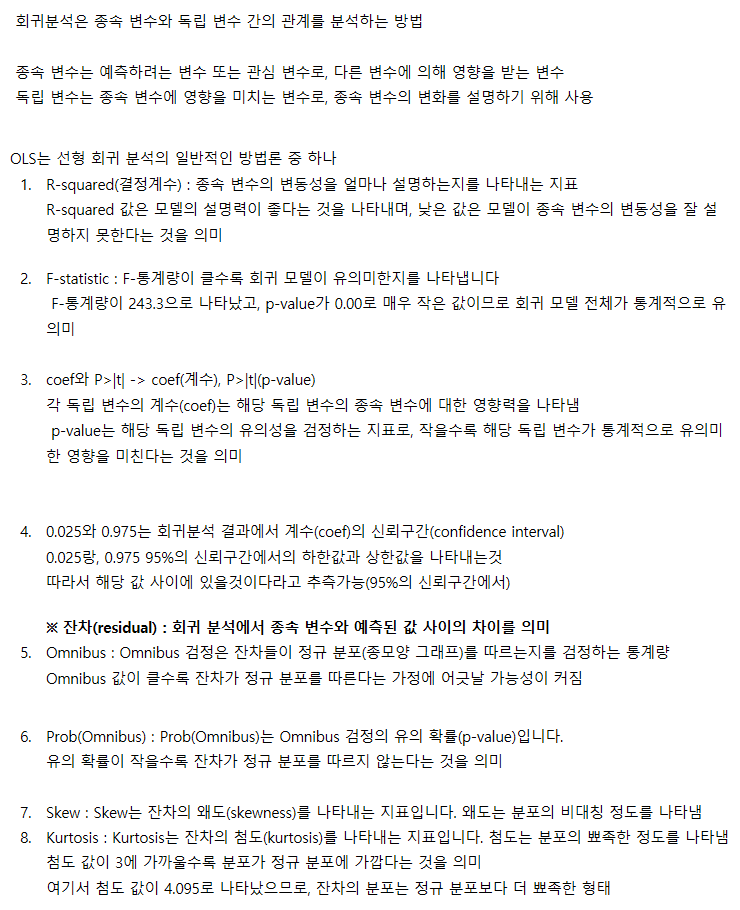

In [28]:
sample1=wine[wine.columns.difference(['quality','type'])]
sample1[:5]

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [29]:
sample1_predict=regression_result.predict(sample1)

In [30]:
sample1_predict[:10]

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
5    5.043903
6    5.017701
7    5.302454
8    5.238861
9    5.690760
dtype: float64

In [31]:
wine['quality'][:10]

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [32]:
data = {
    "fixed_acidity" : [8.5, 8.1], 
    "volatile_acidity":[0.8, 0.5],
    "citric_acid":[0.3, 0.4], 
    "residual_sugar":[6.1, 5.8], 
    "chlorides":[0.055, 0.04], 
    "free_sulfur_dioxide":[30.0, 31.0], 
    "total_sulfur_dioxide":[98.0,99], 
    "density":[0.996, 0.91], 
    "pH":[3.25, 3.01], 
    "sulphates":[0.4, 0.35],
    "alcohol":[9.0, 0.88]}


In [33]:
sample2=pd.DataFrame(data, columns=sample1.columns)

In [35]:
sample2_predict=regression_result.predict(sample2)
print(sample2_predict)

0    4.809094
1    7.582129
dtype: float64


# 분석결과 시각화
- 커널 밀도 추정(kde)를 적용한 히스토그램 그리기 

In [36]:
# 히스토그램 차트 배경 스타일 설정(dark, darkgrid, white, whitegrid)
sns.set_style('dark')

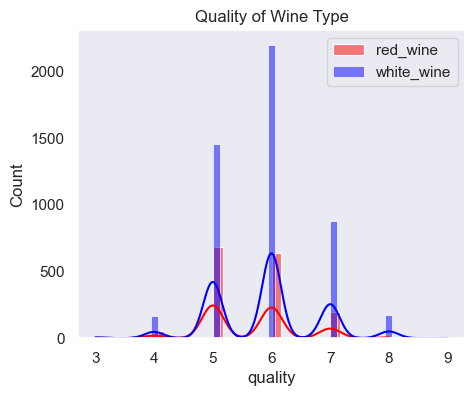

In [38]:
#distplot -> histplot
sns.histplot(data=red_wine_quality, kde=True, color='red', label='red_wine')
sns.histplot(data=white_wine_quality, kde=True, color='blue', label='white_wine')
plt.title('Quality of Wine Type')
plt.legend()
plt.show()

# 부분 회귀 플롯으로 시각화하기
- 독립 변수가 2개 이상인 경우 부분회귀플롯을 사용하여 하나의 독립변수가 종속변수에 미치는 영향력을 시각화하여 분석할 수 있음
- plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)
    - endog : 종속변수 문자열
    - exog_i : 분석 대상이 되는 독립변수 문자열
    - exog_others : 나머지 독립변수 문자열의 리스트
    - data : 모든 데이터가 있는 데이터프레임
    - obs_labels : 데이터 라벨링 여부
    - ret_coords : 잔차 데이터 반환 여부 

In [39]:
# 부분회귀 계산을 위해 로드
import statsmodels.api as sm

In [40]:
# fixed_acidity가 종속변수 quality에 미치는 영향을 시각화하기
# 부분 회귀에 사용한 독립 변수와 종속 변수를 제외한 나머지 변수 리스트를 others 변수에 저장
others=list(set(wine.columns).difference(set(['quality','fixed_acidity'])))

eval_env: 1


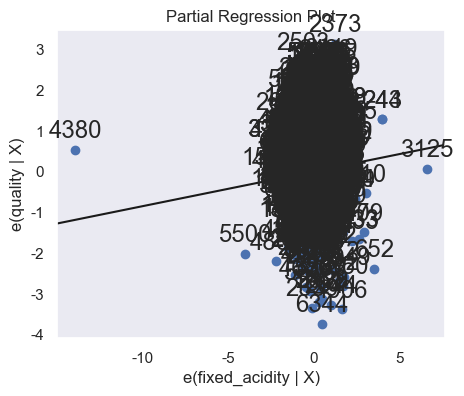

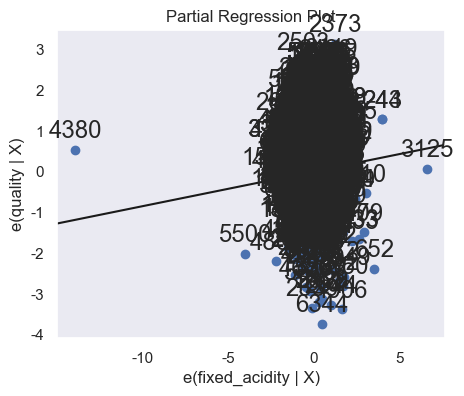

In [41]:
sm.graphics.plot_partregress('quality', 'fixed_acidity', others, data=wine)

eval_env: 1


(<Figure size 500x400 with 1 Axes>,
 (array([-0.0614815 , -0.02284876, -0.14904951, ..., -0.63960939,
         -0.27128396, -0.13872942]),
  array([ 0.02363191,  0.08667536, -0.04281161, ...,  0.55410286,
          0.5178791 , -0.2565605 ])))

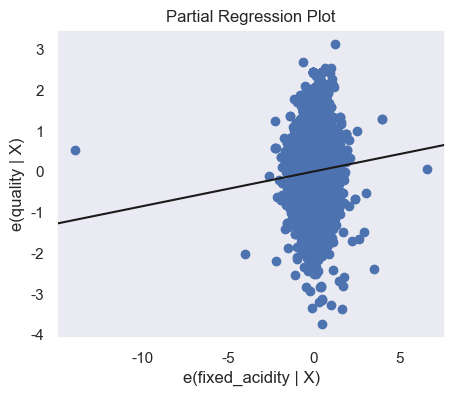

In [42]:
sm.graphics.plot_partregress('quality', 'fixed_acidity', others, data=wine, ret_coords=True, obs_labels=False)

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


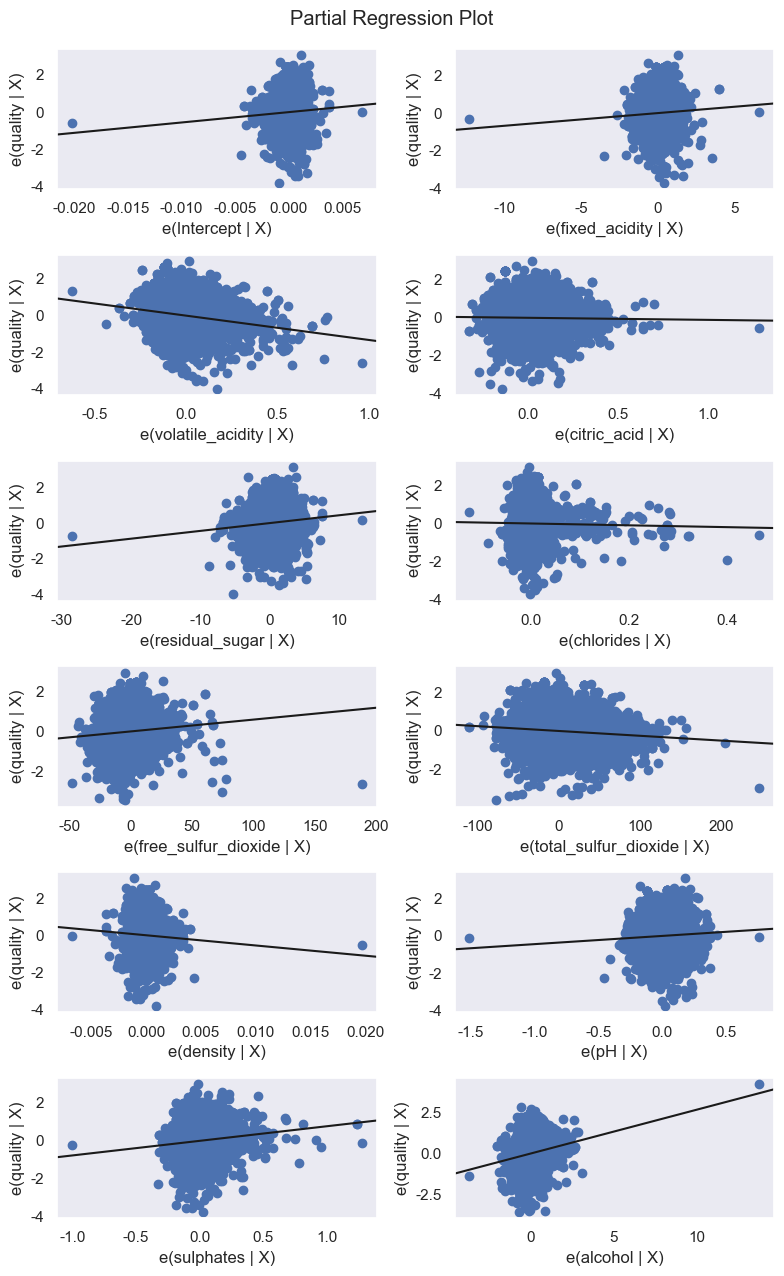

In [43]:
fig=plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()